CONTENTS LIST:
- Creating visualizations of data
- Exporting visualizations as .png files

#01 Import libraries and data

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
#importing data
path = '/Users/gingermoore/Documents/04-2025 Instacart Basket Analysis'
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [5]:
#Checking df
ords_prods_cust.head()

,user_id,Gender,State,Age,date_joined,dependents,fam_status,income,product_id,product_name,...,reordered,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_total,spending_flag,median_days,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,High spender,19.0,Frequent customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,High spender,19.0,Frequent customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,High spender,19.0,Frequent customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,0,Low-range product,Regularly busy,Most orders,8,New customer,7.988889,High spender,19.0,Frequent customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,1,Low-range product,Least busy days,Most orders,8,New customer,7.988889,High spender,19.0,Frequent customer


In [10]:
ords_prods_cust['dependents'].describe()

count    3.239973e+07
mean     1.501891e+00
std      1.118867e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependents, dtype: float64

#02 Histogram for hour of day

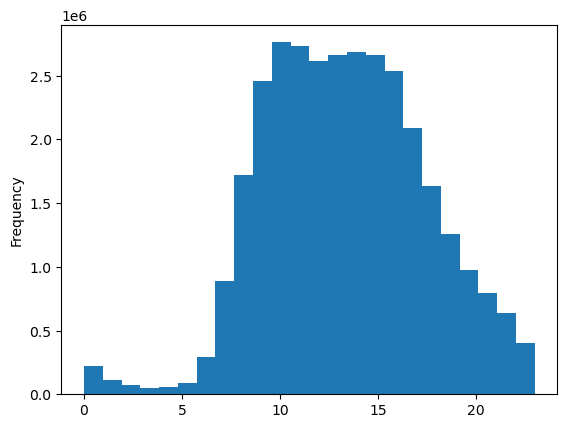

In [69]:
hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

This histogram demonstrates the normal distribution of the hours of the day, with a slight left skew. 

#03 Bar chart from loyalty flag

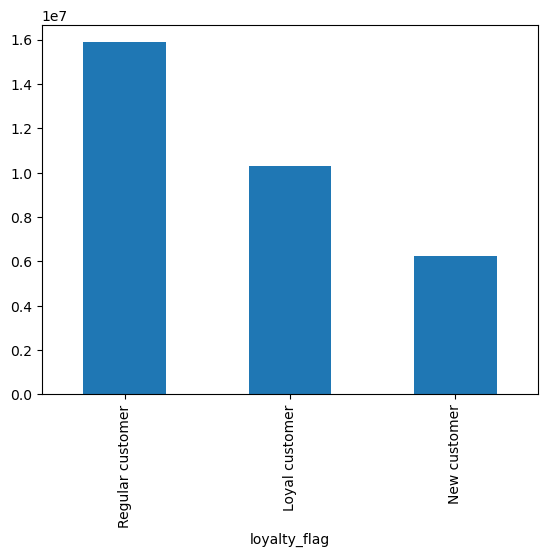

In [71]:
bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

#04 Line chart for prices by hour of day

In [12]:
#Creating seed for accurate sampling
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [13]:
#Splitting into samples
big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [14]:
opc_2 = small[['order_hour_of_day', 'prices',]]

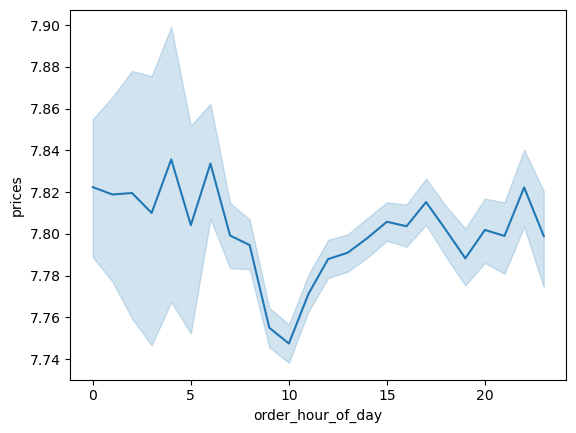

In [15]:
#Creating chart
line = sns.lineplot(data = opc_2, x = 'order_hour_of_day',y = 'prices')

#05 Line chart for age and dependents

In [17]:
opc_3 = small[['Age', 'dependents']]

(0.0, 3.0)

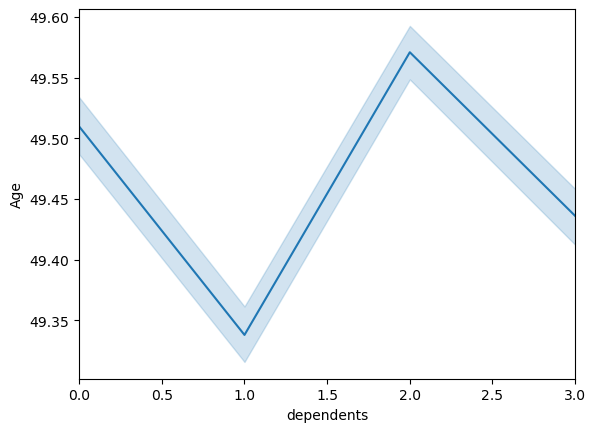

In [61]:
age_dpdts = sns.lineplot(data = opc_3, x = 'dependents', y = 'Age')
age_dpdts.set_xlim(0, 3)

Honestly, I've tried this chart a million different ways. Either I'm doing this wrong or there's no connection between age and family situation. 

#06 Spending power scatterplot

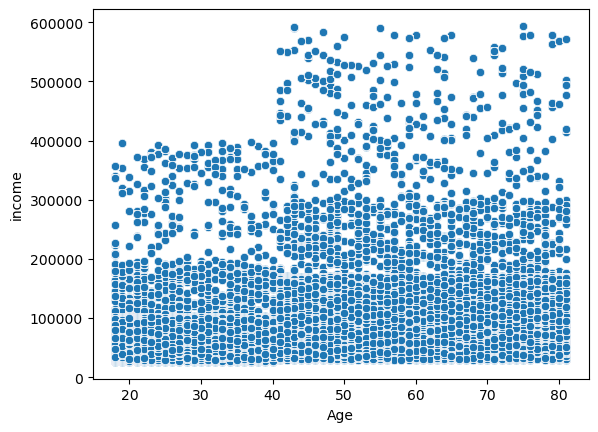

In [73]:
spend = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cust)

This scatterplot indicates that as age increases, spending power also increases, apparently with a sharp increase beginning at 40.

#07 Exporting figures

In [76]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

In [78]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_loyalty.png'))

In [80]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_price.png'))

In [82]:
age_dpdts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependents.png'))

In [84]:
spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_power.png'))